# Problem:

<b>For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.</b>

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<ipython-input-1-896150ef2705>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<b>1. Read the data as an appropriate Time Series data and plot the data.</b>

In [2]:
rose_df=pd.read_csv('Rose.csv',parse_dates=True,index_col=0)
sparkling_df=pd.read_csv('Sparkling.csv',parse_dates=True,index_col=0)

In [3]:
rose_df.head(5)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
sparkling_df.head(5)

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


Rose Wine plot


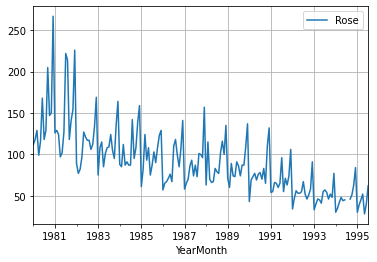

In [5]:
print("Rose Wine plot")
rose_df.plot();
plt.grid()

Sparkling Wine plot


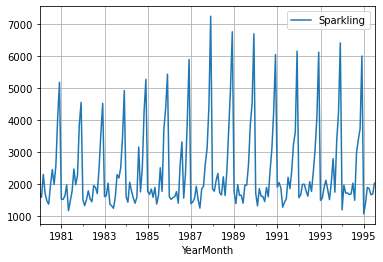

In [6]:
print("Sparkling Wine plot")
sparkling_df.plot();
plt.grid()

<b>2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.</b>

In [7]:
from statsmodels.distributions.empirical_distribution import ECDF

In [8]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [9]:
sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [10]:
rose_df.isnull().sum()

Rose    2
dtype: int64

In [11]:
df = rose_df[rose_df.isna().any(axis=1)]
df

,Rose
YearMonth,
1994-07-01,NaN
1994-08-01,NaN


Treat missing values

In [12]:
rose_df['1994'].tail()

,Rose
YearMonth,
1994-08-01,NaN
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0


In [13]:
rose_df=rose_df.interpolate()

In [14]:
rose_df.isnull().sum()

Rose    0
dtype: int64

In [15]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [16]:
rose_df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [17]:
sparkling_df.isnull().sum()

Sparkling    0
dtype: int64

In [18]:
rose_df.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


In [19]:
sparkling_df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [20]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


Rose Wine plot


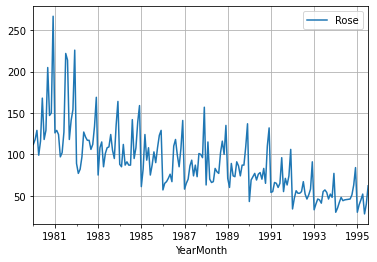

In [21]:
print("Rose Wine plot")
rose_df.plot();
plt.grid()

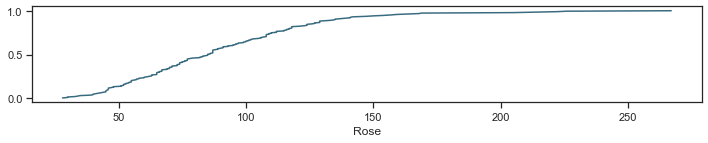

In [22]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(rose_df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Rose');

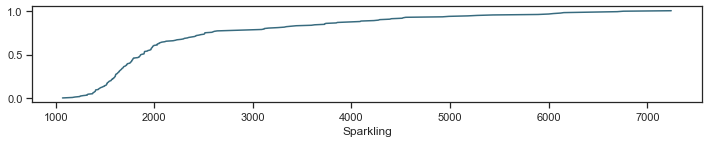

In [23]:
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(sparkling_df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sparkling');

Yearly box plot

Rose


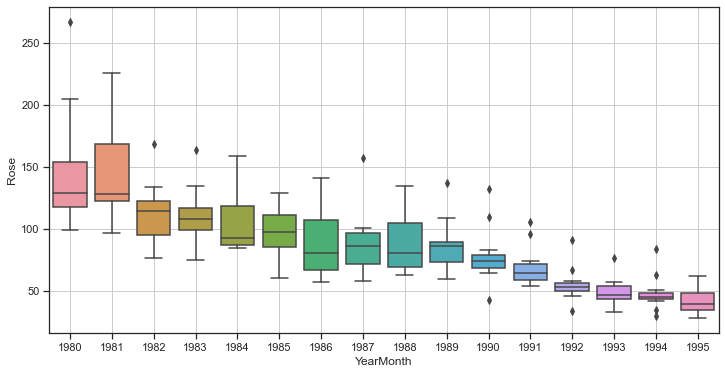

In [24]:
print("Rose")
plt.figure(figsize=(12,6))
sns.boxplot(x = rose_df.index.year,y = rose_df['Rose'])
plt.grid();
plt.show()

Sparkling


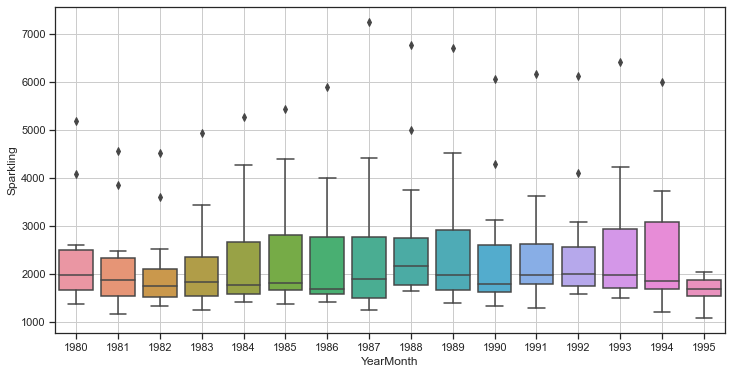

In [25]:
print("Sparkling")
plt.figure(figsize=(12,6))
sns.boxplot(x = sparkling_df.index.year,y = sparkling_df['Sparkling'])
plt.grid();
plt.show()

In [26]:
Rose_monthlysales_across_years = pd.pivot_table(rose_df, values = 'Rose', columns = rose_df.index.month, index = rose_df.index.year)
Rose_monthlysales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.000000,129.000000,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.000000,214.000000,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.000000,117.000000,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.000000,124.000000,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.000000,142.000000,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.000000,103.000000,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.000000,118.000000,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.000000,73.000000,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.000000,77.000000,102.0,116.0,100.0,135.0


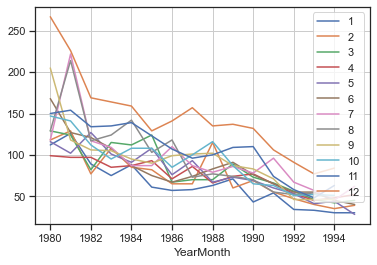

In [27]:
Rose_monthlysales_across_years.plot()
plt.grid()
plt.legend(loc='best');

In [28]:
Sparkling_monthlysales_across_years = pd.pivot_table(sparkling_df, values = 'Sparkling', columns = sparkling_df.index.month, index = sparkling_df.index.year)
Sparkling_monthlysales_across_years

YearMonth,1,2,3,4,5,6,7,8,9,10,11,12
YearMonth,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


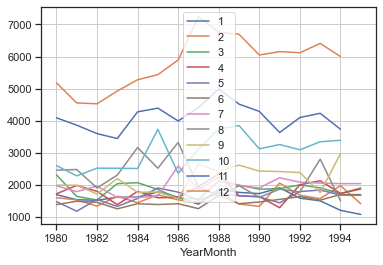

In [29]:
Sparkling_monthlysales_across_years.plot()
plt.grid()
plt.legend(loc='best');

<b>Decomposition</b>

Additive decomposition

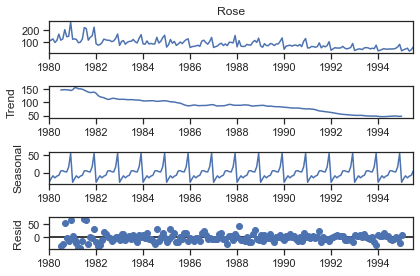

In [30]:
decomposition = seasonal_decompose(rose_df['Rose'],model='additive')
decomposition.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(10),'\n')
print('Seasonality','\n',seasonality.head(10),'\n')
print('Residual','\n',residual.head(10),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.908647
1980-02-01   -17.435632
1980-03-01    -9.285830
1980-04-01   -15.098330
1980-05-01   -10.196544
1980-06-01    -7.678687
1980-07-01     4.896908
1980-08-01     5.499686
1980-09-01     2.774686
1980-10-01     1.871908
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.980241
1980-08-01   -24.624686
1980-09-01    53.850314
1980-10-01    -2.955241
Name: resid, dtype: float64 



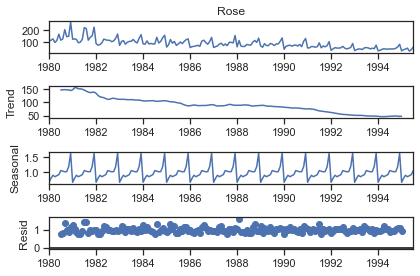

In [32]:
decomposition1 = seasonal_decompose(rose_df['Rose'],model='multiplicative')
decomposition1.plot();

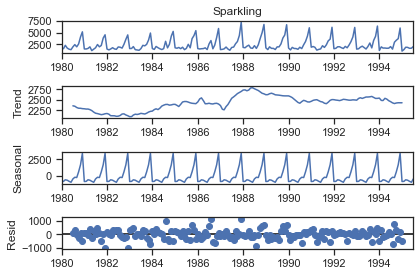

In [33]:
decomposition3 = seasonal_decompose(sparkling_df['Sparkling'],model='additive')
decomposition3.plot();

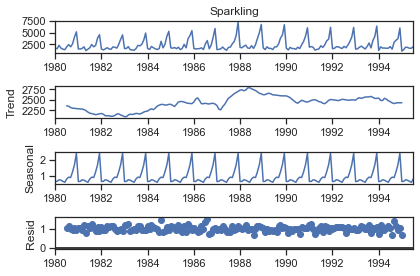

In [34]:
decomposition3 = seasonal_decompose(sparkling_df['Sparkling'],model='multiplicative')
decomposition3.plot();

<b>3. Split the data into training and test. The test data should start in 1991.<b>

In [35]:
train_rose             = rose_df[rose_df.index<'1991'] 
test_rose              = rose_df[rose_df.index>'1991']

In [36]:
train_rose.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [37]:
train_sparkling             = sparkling_df[sparkling_df.index<'1991'] 
test_sparkling              = sparkling_df[sparkling_df.index>'1991']

In [38]:
train_sparkling.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


<b>4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.</b>

In [39]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from sklearn import metrics

<b>Exponential Smoothing Methods</b>
1. Simple exponential smoothing

Rose:

In [40]:
rosetrain = train_rose.copy()
rosetest = test_rose.copy()

In [41]:
model_SES = SimpleExpSmoothing(rosetrain['Rose'])

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [42]:
model_SES_autofit = model_SES.fit(optimized=True)

In [43]:
model_SES_autofit.params

{'smoothing_level': 0.09874985002628338,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 134.38726392126804,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [44]:
rosetest['predict_SES'] = model_SES_autofit.forecast(steps=len(test_rose))
rosetest.head()

,Rose,predict_SES
YearMonth,,
1991-02-01,55.0,87.104998
1991-03-01,66.0,87.104998
1991-04-01,65.0,87.104998
1991-05-01,60.0,87.104998
1991-06-01,65.0,87.104998


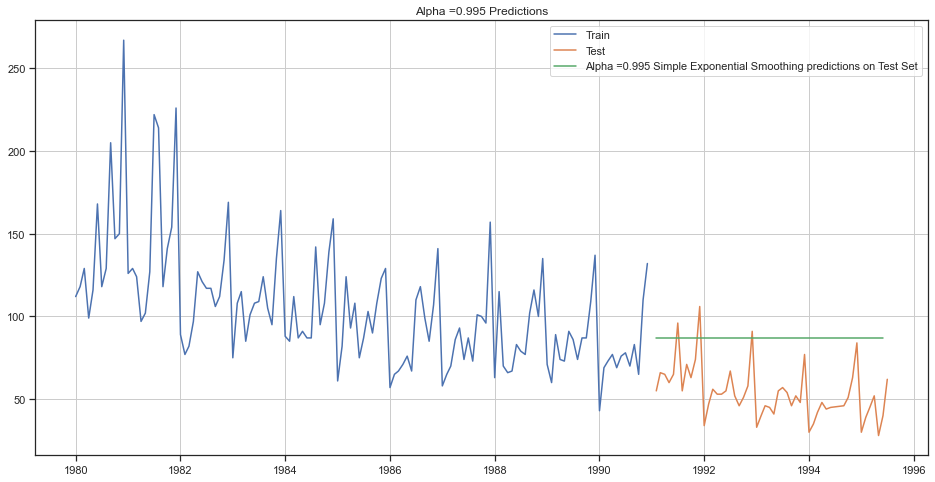

In [45]:
plt.figure(figsize=(16,8))
plt.plot(rosetrain['Rose'], label='Train')
plt.plot(rosetest['Rose'], label='Test')

plt.plot(rosetest['predict_SES'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [46]:
print('SES RMSE (calculated using statsmodels):',em.rmse(test_rose.values,rosetest['predict_SES'].values)[0])

SES RMSE (calculated using statsmodels): 36.8611114357199


In [47]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test_rose.values,rosetest['predict_SES'].values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111


Sparkling:

In [48]:
sparklingtrain = train_sparkling.copy()
sparklingtest = test_sparkling.copy()

In [49]:
model_SES1 = SimpleExpSmoothing(sparklingtrain['Sparkling'])

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [50]:
model_SES_autofit1 = model_SES1.fit(optimized=True)

In [51]:
model_SES_autofit1.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7901027902044,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [52]:
sparklingtest['predict_SES'] = model_SES_autofit.forecast(steps=len(test_rose))
sparklingtest.head()

,Sparkling,predict_SES
YearMonth,,
1991-02-01,2049,87.104998
1991-03-01,1874,87.104998
1991-04-01,1279,87.104998
1991-05-01,1432,87.104998
1991-06-01,1540,87.104998


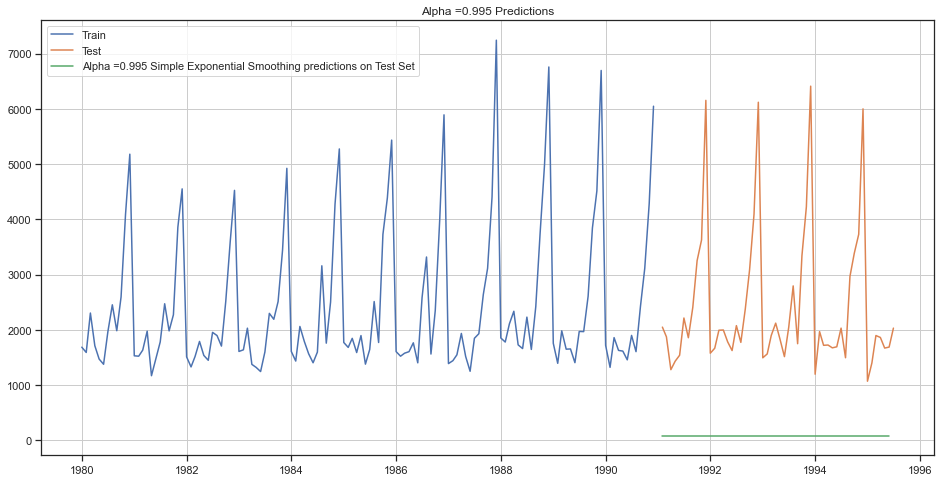

In [53]:
plt.figure(figsize=(16,8))
plt.plot(sparklingtrain['Sparkling'], label='Train')
plt.plot(sparklingtest['Sparkling'], label='Test')

plt.plot(sparklingtest['predict_SES'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [54]:
print('SES RMSE (calculated using statsmodels):',em.rmse(test_sparkling.values,sparklingtest['predict_SES'].values)[0])

SES RMSE (calculated using statsmodels): 2653.195250525042


In [55]:
results_sparkling = pd.DataFrame({'Test RMSE': [em.rmse(test_sparkling.values,sparklingtest['predict_SES'].values)[0]]},index=['Alpha=0.99,SES'])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251


2.Double exponential smoothing / Holt's method

Rose:

In [56]:
model_DES = Holt(rosetrain['Rose'])
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [57]:
rosetest['predict_DES'] = model_DES.forecast(steps=len(test_rose))
rosetest.head()

,Rose,predict_SES,predict_DES
YearMonth,,,
1991-02-01,55.0,87.104998,88.028056
1991-03-01,66.0,87.104998,89.192534
1991-04-01,65.0,87.104998,90.357011
1991-05-01,60.0,87.104998,91.521488
1991-06-01,65.0,87.104998,92.685966


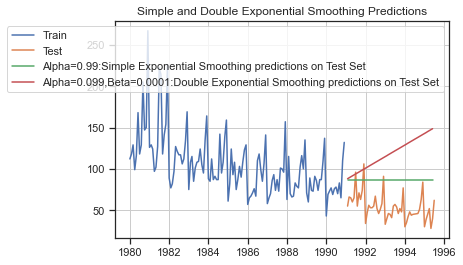

In [58]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(rosetest['predict_SES'], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(rosetest['predict_DES'], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [59]:
print('DES RMSE (calculated using statsmodels):',em.rmse(test_rose.values,rosetest['predict_DES'].values)[0])

DES RMSE (calculated using statsmodels): 37.69592505604192


In [60]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [em.rmse(test_rose.values,rosetest['predict_DES'].values)[0]]},index=['Alpha=1,Beta=0.0189:DES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111
"Alpha=1,Beta=0.0189:DES",37.695925


Sparkling:

In [61]:
model_DES1 = Holt(sparklingtrain['Sparkling'])
# Fitting the model
model_DES1 = model_DES1.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES1.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6477793434322846, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 1686.083818806434, 'initial_slope': 27.072937320155905, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [62]:
sparklingtest['predict_DES'] = model_DES1.forecast(steps=len(test_sparkling))
sparklingtest.head()

,Sparkling,predict_SES,predict_DES
YearMonth,,,
1991-02-01,2049,87.104998,5308.495035
1991-03-01,1874,87.104998,5335.567972
1991-04-01,1279,87.104998,5362.640909
1991-05-01,1432,87.104998,5389.713846
1991-06-01,1540,87.104998,5416.786784


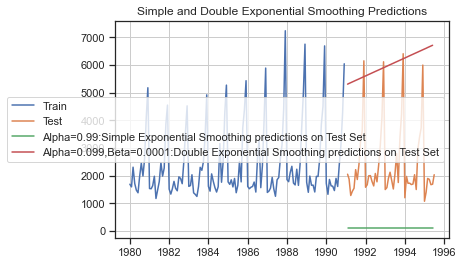

In [63]:
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(sparklingtest['predict_SES'], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(sparklingtest['predict_DES'], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [64]:
print('DES RMSE (calculated using statsmodels):',em.rmse(test_sparkling.values,sparklingtest['predict_DES'].values)[0])

DES RMSE (calculated using statsmodels): 3172.079532399455


In [65]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [em.rmse(test_sparkling.values,sparklingtest['predict_DES'].values)[0]]},index=['Alpha=1,Beta=0.0189:DES'])
results_sparkling = pd.concat([results_sparkling, resultsDf_temp])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251
"Alpha=1,Beta=0.0189:DES",3172.079532


3.Triple exponential smoothing / Holt-Winter's model

Rose-Additive TES:

In [66]:
model_TES = ExponentialSmoothing(train_rose,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.13347307811128115, 'smoothing_slope': 0.013794460794462322, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 77.91993489048245, 'initial_slope': 0.0, 'initial_seasons': array([ 37.17816974,  49.51586963,  57.48442319,  46.82735366,
        55.61555356,  61.04801959,  70.9345658 ,  76.98792802,
        72.97133028,  71.04317894,  89.1094477 , 131.35896726]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [67]:
rosetest['predict_TES'] = model_TES.forecast(steps=len(test_rose))
rosetest.head()

,Rose,predict_SES,predict_DES,predict_TES
YearMonth,,,,
1991-02-01,55.0,87.104998,88.028056,56.069774
1991-03-01,66.0,87.104998,89.192534,63.642832
1991-04-01,65.0,87.104998,90.357011,52.590267
1991-05-01,60.0,87.104998,91.521488,60.982971
1991-06-01,65.0,87.104998,92.685966,66.019942


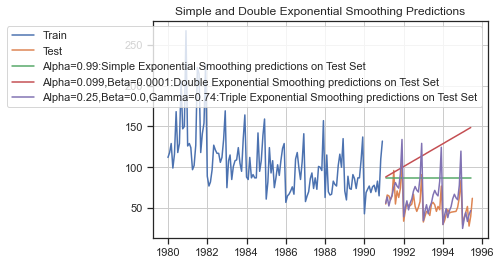

In [68]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(rosetest['predict_SES'], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(rosetest['predict_DES'], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(rosetest['predict_TES'], label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [69]:
print('TES RMSE ADD (calculated using statsmodels):',em.rmse(test_rose.values,rosetest['predict_TES'].values)[0])

TES RMSE ADD (calculated using statsmodels): 16.058922702771213


In [70]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [em.rmse(test_rose.values,rosetest['predict_TES'].values)[0]]},index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111
"Alpha=1,Beta=0.0189:DES",37.695925
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.058923


Sparkling-additive TES:

In [71]:
model_TES1 = ExponentialSmoothing(train_sparkling,trend='additive',seasonal='additive')
# Fitting the model
model_TES1 = model_TES1.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES1.params)

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08620807620652111, 'smoothing_slope': 2.5318127264805285e-10, 'smoothing_seasonal': 0.4763318881970767, 'damping_slope': nan, 'initial_level': 1684.856831619659, 'initial_slope': 0.006547258914785458, 'initial_seasons': array([  39.18349969,  -37.78583681,  464.67331107,  206.1306033 ,
       -141.07452355, -157.23487797,  338.09368962,  856.86721657,
        403.58906901,  971.28204491, 2401.59300214, 3426.63695382]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [72]:
sparklingtest['predict_TES'] = model_TES1.forecast(steps=len(test_sparkling))
sparklingtest.head()

,Sparkling,predict_SES,predict_DES,predict_TES
YearMonth,,,,
1991-02-01,2049,87.104998,5308.495035,1241.418545
1991-03-01,1874,87.104998,5335.567972,1726.805458
1991-04-01,1279,87.104998,5362.640909,1584.356020
1991-05-01,1432,87.104998,5389.713846,1494.048198
1991-06-01,1540,87.104998,5416.786784,1311.504612


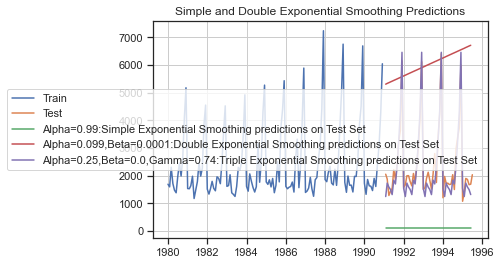

In [73]:
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(sparklingtest['predict_SES'], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(sparklingtest['predict_DES'], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(sparklingtest['predict_TES'], label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [74]:
print('TES RMSE ADD (calculated using statsmodels):',em.rmse(test_sparkling.values,sparklingtest['predict_TES'].values)[0])

TES RMSE ADD (calculated using statsmodels): 1735.7970568084324


In [75]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [em.rmse(test_sparkling.values,sparklingtest['predict_TES'].values)[0]]},index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])
results_sparkling = pd.concat([results_sparkling, resultsDf_temp])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251
"Alpha=1,Beta=0.0189:DES",3172.079532
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1735.797057


Rose-Multiplicative TES:

In [76]:
model_TES_am = ExponentialSmoothing(train_rose,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.10609630896598816, 'smoothing_slope': 0.048438506611339596, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 76.65565108239777, 'initial_slope': 0.0, 'initial_seasons': array([1.47550257, 1.65927135, 1.80572621, 1.58888812, 1.77822689,
       1.92604353, 2.11649443, 2.25135182, 2.11690561, 2.08112817,
       2.4092726 , 3.30448096]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [77]:
rosetest['predict_TES_MUL'] = model_TES_am.forecast(steps=len(test_rose))
rosetest.head()

,Rose,predict_SES,predict_DES,predict_TES,predict_TES_MUL
YearMonth,,,,,
1991-02-01,55.0,87.104998,88.028056,56.069774,63.471277
1991-03-01,66.0,87.104998,89.192534,63.642832,68.788790
1991-04-01,65.0,87.104998,90.357011,52.590267,60.277828
1991-05-01,60.0,87.104998,91.521488,60.982971,67.180379
1991-06-01,65.0,87.104998,92.685966,66.019942,72.461082


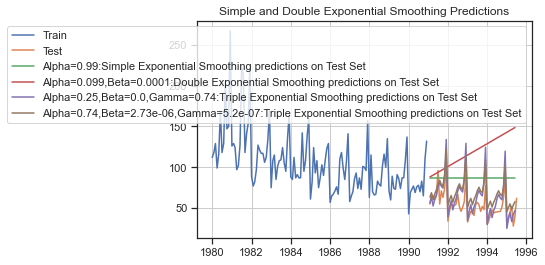

In [78]:
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(rosetest['predict_SES'], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(rosetest['predict_DES'], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(rosetest['predict_TES'], label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(rosetest['predict_TES_MUL'], label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [79]:
print('TES_MUL RMSE (calculated using statsmodels):',em.rmse(test_rose.values,rosetest['predict_TES_MUL'].values)[0])

TES_MUL RMSE (calculated using statsmodels): 18.58771529754031


In [80]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [em.rmse(test_rose.values,rosetest['predict_TES_MUL'].values)[0]]},index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111
"Alpha=1,Beta=0.0189:DES",37.695925
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.058923
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.587715


Sparkling-Multiplicative TES:

In [81]:
model_TES_am1 = ExponentialSmoothing(train_sparkling,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am1 = model_TES_am1.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am1.params)

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15422215345902165, 'smoothing_slope': 2.6836273360597693e-21, 'smoothing_seasonal': 0.37132238239976756, 'damping_slope': nan, 'initial_level': 1639.9993318334934, 'initial_slope': 4.848983218641197, 'initial_seasons': array([1.00842014, 0.96898448, 1.24179403, 1.1320575 , 0.93981009,
       0.93811201, 1.2245818 , 1.54428852, 1.27336069, 1.6319816 ,
       2.48292921, 3.11861884]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [82]:
sparklingtest['predict_TES_MUL'] = model_TES_am1.forecast(steps=len(test_sparkling))
sparklingtest.head()

,Sparkling,predict_SES,predict_DES,predict_TES,predict_TES_MUL
YearMonth,,,,,
1991-02-01,2049,87.104998,5308.495035,1241.418545,1373.887030
1991-03-01,1874,87.104998,5335.567972,1726.805458,1807.440446
1991-04-01,1279,87.104998,5362.640909,1584.356020,1704.576312
1991-05-01,1432,87.104998,5389.713846,1494.048198,1602.379889
1991-06-01,1540,87.104998,5416.786784,1311.504612,1415.484923


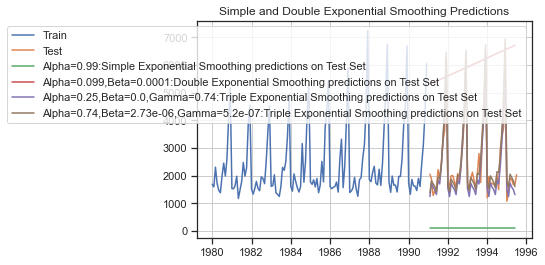

In [83]:
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(sparklingtest['predict_SES'], label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(sparklingtest['predict_DES'], label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(sparklingtest['predict_TES'], label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(sparklingtest['predict_TES_MUL'], label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [84]:
print('TES_MUL RMSE (calculated using statsmodels):',em.rmse(test_rose.values,sparklingtest['predict_TES_MUL'].values)[0])

TES_MUL RMSE (calculated using statsmodels): 1320.1309940814513


In [85]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [em.rmse(test_sparkling.values,sparklingtest['predict_TES_MUL'].values)[0]]},index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])
results_sparkling = pd.concat([results_sparkling, resultsDf_temp])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251
"Alpha=1,Beta=0.0189:DES",3172.079532
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1735.797057
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1649.659222


<b>Linear Regession</b>

Rose:

In [86]:
train_time = [i+1 for i in range(len(train_rose))]
test_time = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [87]:
rosetrain['time'] = train_time
rosetest['time'] = test_time

In [88]:
print('First few rows of Training Data','\n',rosetrain.head(),'\n')
print('Last few rows of Training Data','\n',rosetrain.tail(),'\n')
print('First few rows of Test Data','\n',rosetest.head(),'\n')
print('Last few rows of Test Data','\n',rosetest.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 

First few rows of Test Data 
             Rose  predict_SES  predict_DES  predict_TES  predict_TES_MUL  time
YearMonth                                                                     
1991-02-01  55.0    87.104998    88.028056    56.069774        63.471277   133
1991-03-01  66.0    87.104998    89.192534    63.642832        68.788790   134
1991-04-01  65.0    87.104998    90.357011    52.590267        60.277828   135
1991-05-01  60.0    87.104998    91.521488    60.982971        67.180379   136
1991-06-01  65.0    87.104998    92.685966    66.019942        72.461082   137 

Last few

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()

In [91]:
lr.fit(rosetrain[['time']],rosetrain['Rose'].values)

LinearRegression()

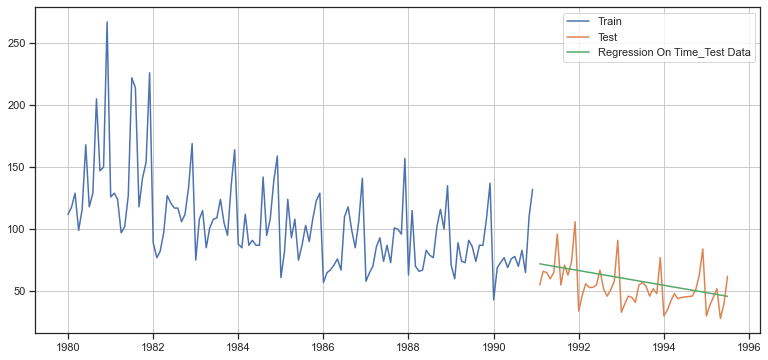

In [92]:
test_predictions_model1         = lr.predict(rosetest[['time']])
rosetest['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(rosetest['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [93]:
rmse_LR_rosetest = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_rosetest))

For RegressionOnTime forecast on the Test Data,  RMSE is 15.370


In [94]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_LR_rosetest]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111
"Alpha=1,Beta=0.0189:DES",37.695925
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.058923
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.587715
RegressionOnTime,15.369603


Sparkling:

In [95]:
train_time1 = [i+1 for i in range(len(train_sparkling))]
test_time1 = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time1)
print('Test Time instance','\n',test_time1)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [96]:
sparklingtrain['time'] = train_time1
sparklingtest['time'] = test_time1

In [97]:
print('First few rows of Training Data','\n',sparklingtrain.head(),'\n')
print('Last few rows of Training Data','\n',sparklingtrain.tail(),'\n')
print('First few rows of Test Data','\n',sparklingtest.tail(),'\n')
print('Last few rows of Test Data','\n',sparklingtest.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  predict_SES  predict_DES  predict_TES  predict_TES_MUL  \
YearMonth                                                                       
1995-03-01       1897    87.104998  6635.068963  1727.119727      2049.202674   
1995-04-01       1862    87.104998  6662.141901  1584.670288      1931.945890   
1995-05-01       1670    87.104998  6689.214838  1494.362466      1815.525406   
1995-06-01       1688    87.104998  6716.287775  1311.818880      1603.249691   
1995-07-01       2031

In [98]:
lr.fit(sparklingtrain[['time']],sparklingtrain['Sparkling'].values)

LinearRegression()

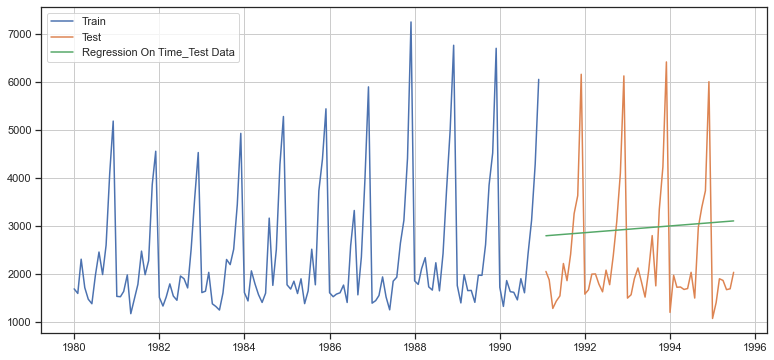

In [99]:
test_predictions_model2         = lr.predict(sparklingtest[['time']])
sparklingtest['RegOnTime'] = test_predictions_model2

plt.figure(figsize=(13,6))
plt.plot( train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(sparklingtest['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [100]:
rmse_LR_sparklingtest = metrics.mean_squared_error(test_sparkling['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_LR_sparklingtest))

For RegressionOnTime forecast on the Test Data,  RMSE is 1394.441


In [101]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_LR_sparklingtest]},index=['RegressionOnTime'])
results_sparkling = pd.concat([results_sparkling, resultsDf_temp])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251
"Alpha=1,Beta=0.0189:DES",3172.079532
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1735.797057
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1649.659222
RegressionOnTime,1394.441182


<b>Naive Approach</b>

Rose:

In [102]:
rosetest['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
rosetest.head()

,Rose,predict_SES,predict_DES,predict_TES,predict_TES_MUL,time,RegOnTime,naive
YearMonth,,,,,,,,
1991-02-01,55.0,87.104998,88.028056,56.069774,63.471277,133,72.063266,132.0
1991-03-01,66.0,87.104998,89.192534,63.642832,68.788790,134,71.568888,132.0
1991-04-01,65.0,87.104998,90.357011,52.590267,60.277828,135,71.074511,132.0
1991-05-01,60.0,87.104998,91.521488,60.982971,67.180379,136,70.580133,132.0
1991-06-01,65.0,87.104998,92.685966,66.019942,72.461082,137,70.085755,132.0


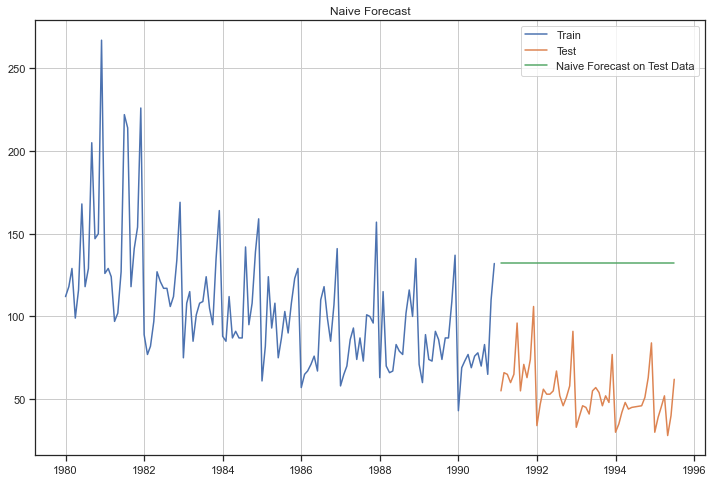

In [103]:
plt.figure(figsize=(12,8))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(rosetest['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [104]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test_rose['Rose'],rosetest['naive'],squared=False)
print("For Naive forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.750


In [105]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111
"Alpha=1,Beta=0.0189:DES",37.695925
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.058923
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.587715
RegressionOnTime,15.369603
NaiveModel,79.750253


Sparkling:

In [106]:
sparklingtest['naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]
sparklingtest.head()

,Sparkling,predict_SES,predict_DES,predict_TES,predict_TES_MUL,time,RegOnTime,naive
YearMonth,,,,,,,,
1991-02-01,2049,87.104998,5308.495035,1241.418545,1373.887030,133,2791.652093,6047
1991-03-01,1874,87.104998,5335.567972,1726.805458,1807.440446,134,2797.484752,6047
1991-04-01,1279,87.104998,5362.640909,1584.356020,1704.576312,135,2803.317410,6047
1991-05-01,1432,87.104998,5389.713846,1494.048198,1602.379889,136,2809.150069,6047
1991-06-01,1540,87.104998,5416.786784,1311.504612,1415.484923,137,2814.982727,6047


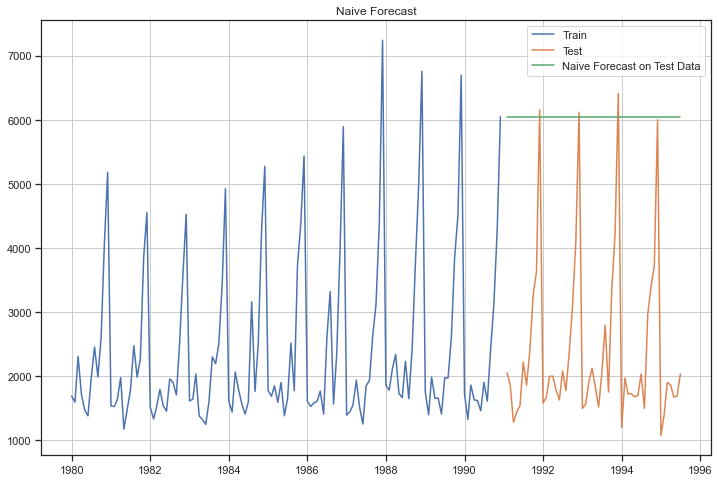

In [107]:
plt.figure(figsize=(12,8))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(sparklingtest['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [108]:
## Test Data - RMSE

rmse_model2_test2 = metrics.mean_squared_error(test_sparkling['Sparkling'],sparklingtest['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test2))

For RegressionOnTime forecast on the Test Data,  RMSE is 3858.888


In [109]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test2]},index=['NaiveModel'])
results_sparkling = pd.concat([results_sparkling, resultsDf_temp])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251
"Alpha=1,Beta=0.0189:DES",3172.079532
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1735.797057
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1649.659222
RegressionOnTime,1394.441182
NaiveModel,3858.888237


<b>Simple average</b>

Rose:

In [110]:
rosetest['mean_forecast'] = train_rose['Rose'].mean()
rosetest.head()

,Rose,predict_SES,predict_DES,predict_TES,predict_TES_MUL,time,RegOnTime,naive,mean_forecast
YearMonth,,,,,,,,,
1991-02-01,55.0,87.104998,88.028056,56.069774,63.471277,133,72.063266,132.0,104.939394
1991-03-01,66.0,87.104998,89.192534,63.642832,68.788790,134,71.568888,132.0,104.939394
1991-04-01,65.0,87.104998,90.357011,52.590267,60.277828,135,71.074511,132.0,104.939394
1991-05-01,60.0,87.104998,91.521488,60.982971,67.180379,136,70.580133,132.0,104.939394
1991-06-01,65.0,87.104998,92.685966,66.019942,72.461082,137,70.085755,132.0,104.939394


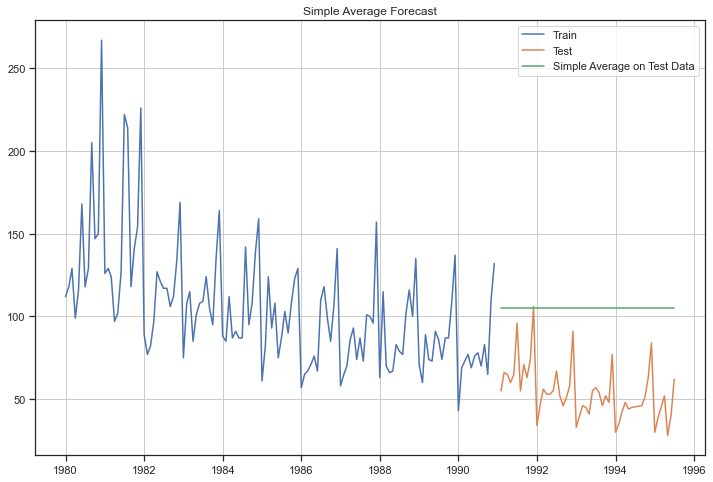

In [111]:
plt.figure(figsize=(12,8))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(rosetest['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [112]:
rmse_model3_test = metrics.mean_squared_error(test_rose['Rose'],rosetest['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.506


In [113]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111
"Alpha=1,Beta=0.0189:DES",37.695925
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.058923
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.587715
RegressionOnTime,15.369603
NaiveModel,79.750253
SimpleAverageModel,53.506138


Sparkling:

In [114]:
sparklingtest['mean_forecast'] = train_sparkling['Sparkling'].mean()
sparklingtest.head()

,Sparkling,predict_SES,predict_DES,predict_TES,predict_TES_MUL,time,RegOnTime,naive,mean_forecast
YearMonth,,,,,,,,,
1991-02-01,2049,87.104998,5308.495035,1241.418545,1373.887030,133,2791.652093,6047,2403.780303
1991-03-01,1874,87.104998,5335.567972,1726.805458,1807.440446,134,2797.484752,6047,2403.780303
1991-04-01,1279,87.104998,5362.640909,1584.356020,1704.576312,135,2803.317410,6047,2403.780303
1991-05-01,1432,87.104998,5389.713846,1494.048198,1602.379889,136,2809.150069,6047,2403.780303
1991-06-01,1540,87.104998,5416.786784,1311.504612,1415.484923,137,2814.982727,6047,2403.780303


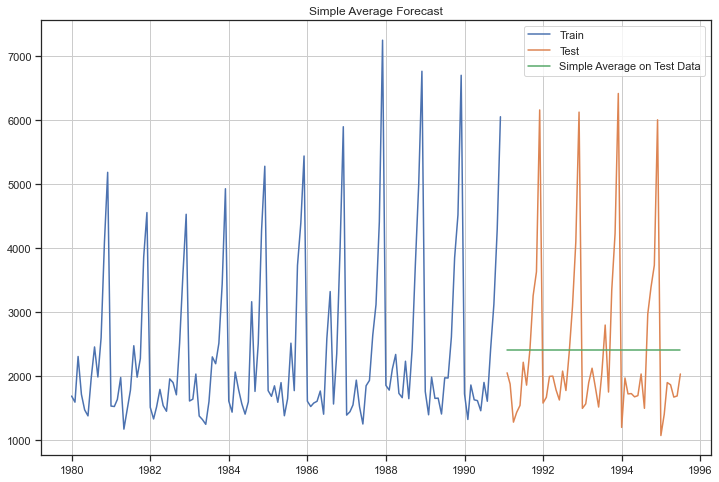

In [115]:
plt.figure(figsize=(12,8))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(sparklingtest['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [116]:
rmse_model3_test1 = metrics.mean_squared_error(test_sparkling['Sparkling'],sparklingtest['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test1))

For Simple Average forecast on the Test Data,  RMSE is 1285.021


In [117]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test1]},index=['SimpleAverageModel'])
results_sparkling = pd.concat([results_sparkling, resultsDf_temp])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251
"Alpha=1,Beta=0.0189:DES",3172.079532
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1735.797057
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1649.659222
RegressionOnTime,1394.441182
NaiveModel,3858.888237
SimpleAverageModel,1285.021003


<b>Moving Average</b>

Rose:

In [118]:
MovingAverage = rose_df.copy()
MovingAverage.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [119]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,112.0,NaN,NaN,NaN,NaN
1980-02-01,118.0,115.0,NaN,NaN,NaN
1980-03-01,129.0,123.5,NaN,NaN,NaN
1980-04-01,99.0,114.0,114.5,NaN,NaN
1980-05-01,116.0,107.5,115.5,NaN,NaN


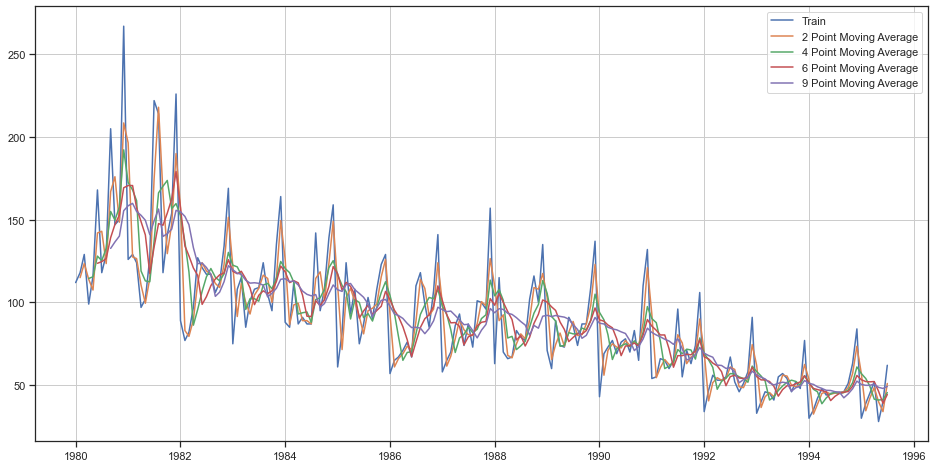

In [120]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [121]:
#Creating train and test set 
rosetrain=MovingAverage[MovingAverage.index<'1991']
rosetest=MovingAverage[MovingAverage.index>'1991']

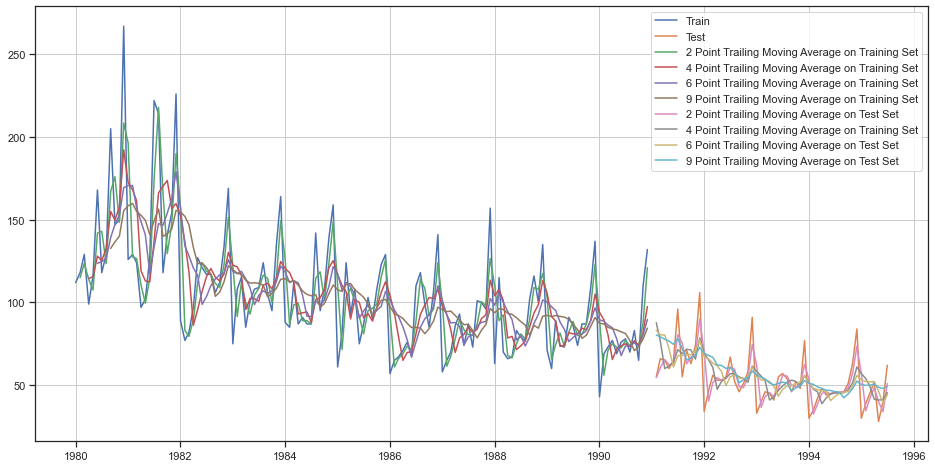

In [122]:

plt.figure(figsize=(16,8))
plt.plot(rosetrain['Rose'], label='Train')
plt.plot(rosetest['Rose'], label='Test')

plt.plot(rosetrain['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(rosetrain['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(rosetrain['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(rosetrain['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(rosetest['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(rosetest['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(rosetest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(rosetest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [123]:
rosetest.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-02-01,55.0,54.5,87.75,83.166667,80.333333
1991-03-01,66.0,60.5,76.75,80.333333,79.222222
1991-04-01,65.0,65.5,60.00,80.333333,77.777778
1991-05-01,60.0,62.5,61.50,72.000000,76.666667
1991-06-01,65.0,62.5,64.00,60.833333,74.666667


In [124]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(rosetest['Rose'],rosetest['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(rosetest['Rose'],rosetest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(rosetest['Rose'],rosetest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(rosetest['Rose'],rosetest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 10.355
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 13.725
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.055
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.371 


In [125]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",36.861111
"Alpha=1,Beta=0.0189:DES",37.695925
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.058923
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.587715
RegressionOnTime,15.369603
NaiveModel,79.750253
SimpleAverageModel,53.506138
2pointTrailingMovingAverage,10.354667
4pointTrailingMovingAverage,13.725015
6pointTrailingMovingAverage,14.054791


Sparkling:

In [126]:
MovingAverage1 = sparkling_df.copy()
MovingAverage1.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [127]:
MovingAverage1['Trailing_2'] = MovingAverage1['Sparkling'].rolling(2).mean()
MovingAverage1['Trailing_4'] = MovingAverage1['Sparkling'].rolling(4).mean()
MovingAverage1['Trailing_6'] = MovingAverage1['Sparkling'].rolling(6).mean()
MovingAverage1['Trailing_9'] = MovingAverage1['Sparkling'].rolling(9).mean()

MovingAverage1.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686,NaN,NaN,NaN,NaN
1980-02-01,1591,1638.5,NaN,NaN,NaN
1980-03-01,2304,1947.5,NaN,NaN,NaN
1980-04-01,1712,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1591.5,1769.50,NaN,NaN


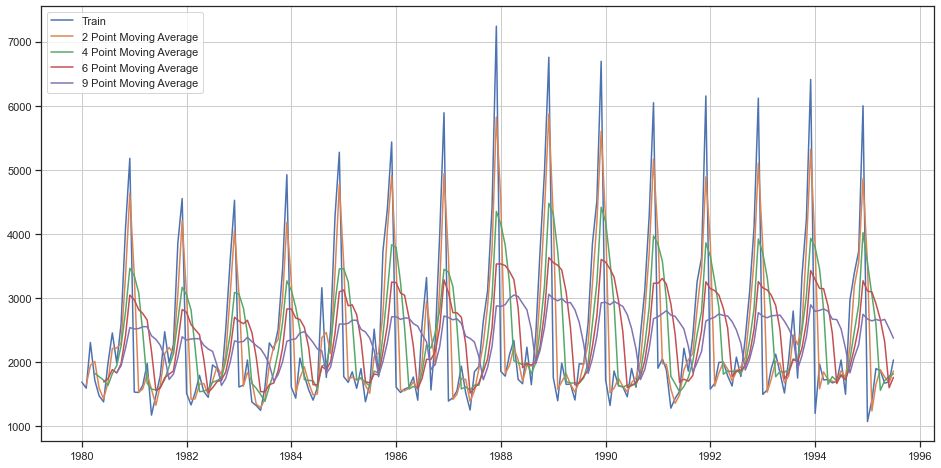

In [128]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage1['Sparkling'], label='Train')
plt.plot(MovingAverage1['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage1['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage1['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage1['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [129]:
#Creating train and test set 
sparklingtrain=MovingAverage1[MovingAverage1.index<'1991']
sparklingtest=MovingAverage1[MovingAverage1.index>'1991']

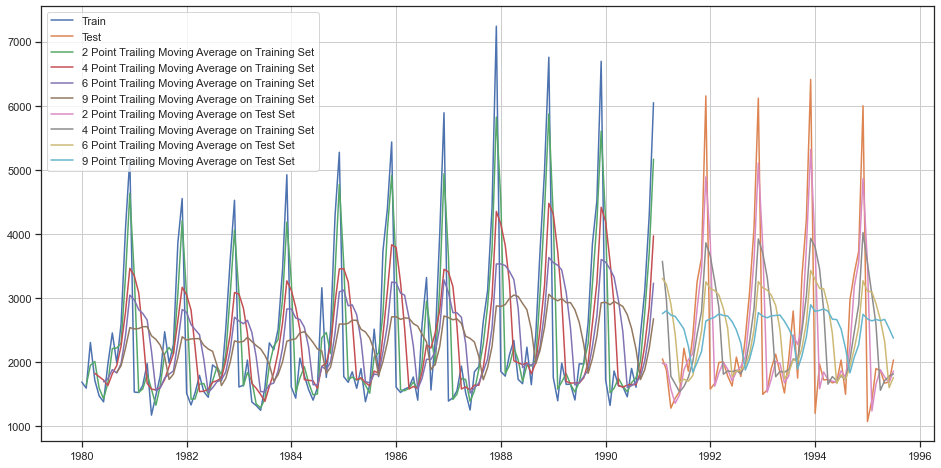

In [130]:

plt.figure(figsize=(16,8))
plt.plot(sparklingtrain['Sparkling'], label='Train')
plt.plot(sparklingtest['Sparkling'], label='Test')

plt.plot(sparklingtrain['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(sparklingtrain['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(sparklingtrain['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(sparklingtrain['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(sparklingtest['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(sparklingtest['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(sparklingtest['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(sparklingtest['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [131]:
sparklingtest.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-02-01,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-01,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-01,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-01,1432,1355.5,1658.50,2430.500000,2712.111111
1991-06-01,1540,1486.0,1531.25,1679.333333,2613.888889


In [132]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_sparkling_2 = metrics.mean_squared_error(sparklingtest['Sparkling'],sparklingtest['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_sparkling_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_sparkling_4 = metrics.mean_squared_error(sparklingtest['Sparkling'],sparklingtest['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_sparkling_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_sparkling_6 = metrics.mean_squared_error(sparklingtest['Sparkling'],sparklingtest['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_sparkling_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_sparkling_9 = metrics.mean_squared_error(sparklingtest['Sparkling'],sparklingtest['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_sparkling_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 770.929
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1137.137
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.097
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1354.278 


In [133]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_sparkling_2,rmse_sparkling_4
                                          ,rmse_sparkling_6,rmse_sparkling_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
results_sparkling = pd.concat([results_sparkling, resultsDf_temp])
results_sparkling

,Test RMSE
"Alpha=0.99,SES",2653.195251
"Alpha=1,Beta=0.0189:DES",3172.079532
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1735.797057
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1649.659222
RegressionOnTime,1394.441182
NaiveModel,3858.888237
SimpleAverageModel,1285.021003
2pointTrailingMovingAverage,770.928742
4pointTrailingMovingAverage,1137.137053
6pointTrailingMovingAverage,1283.096993


<b>5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.</b>

In [134]:
## Test for stationarity of the series - Dicky Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

Rose:

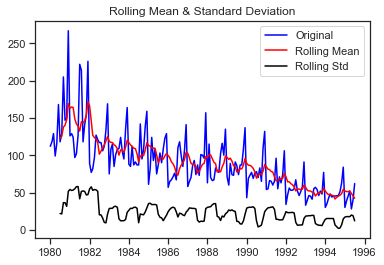

Results of Dickey-Fuller Test:
Test Statistic                  -1.876699
p-value                          0.343101
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [135]:
test_stationarity(rose_df['Rose'])

For alpha = 0.05, it is evident that p value is greater and therefore the time series of rose dataframe is non-stationary.

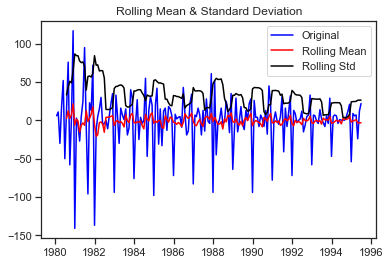

Results of Dickey-Fuller Test:
Test Statistic                -8.044392e+00
p-value                        1.810895e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [136]:
test_stationarity(rose_df['Rose'].diff().dropna())

For alpha = 0.05, p values is lesser than alpha after first order differencing and therefore now the time series of rose dataset is stationary.

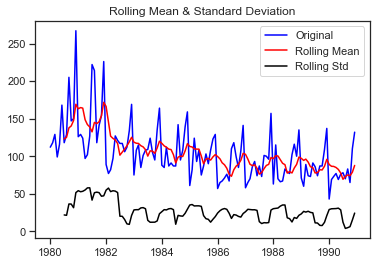

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [137]:
test_stationarity(train_rose['Rose'])

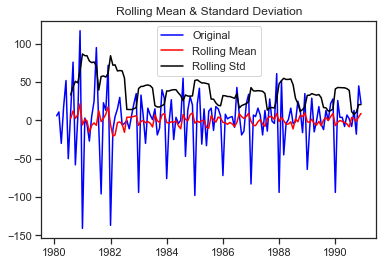

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [138]:
test_stationarity(train_rose['Rose'].diff().dropna())

Sparkling:

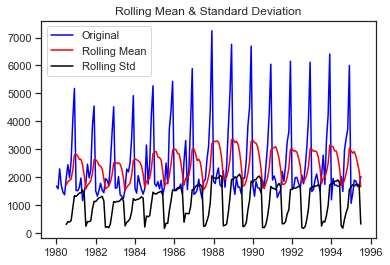

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [139]:
test_stationarity(sparkling_df['Sparkling'])

For alpha = 0.05, it is evident that p value is greater and therefore the time series of sparkling dataframe is non-stationary.

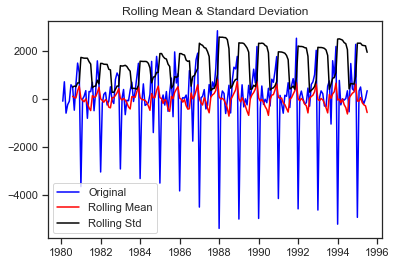

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [140]:
test_stationarity(sparkling_df['Sparkling'].diff().dropna())

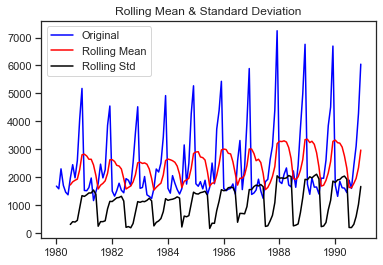

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [141]:
test_stationarity(train_sparkling['Sparkling'])

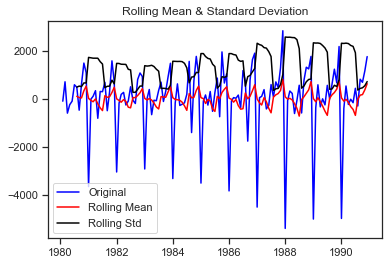

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [142]:
test_stationarity(train_sparkling['Sparkling'].diff().dropna())

For alpha = 0.05, p values is lesser than alpha after first order differencing and therefore now the time series of rose dataset is stationary.

<b>6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</b>

In [143]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [144]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


<b>Rose - ARIMA:</b>

In [145]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464336
ARIMA(0, 1, 2) - AIC:1276.8353731090106
ARIMA(1, 1, 0) - AIC:1319.3483105801806
ARIMA(1, 1, 1) - AIC:1277.7757528008215
ARIMA(1, 1, 2) - AIC:1277.3592236322227
ARIMA(2, 1, 0) - AIC:1300.609261174594
ARIMA(2, 1, 1) - AIC:1279.0456894093172
ARIMA(2, 1, 2) - AIC:1279.2986939365428


In [146]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775753
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [147]:
auto_ARIMA = ARIMA(train_rose['Rose'], order=(0,1,2),freq='MS')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Tue, 26 Jan 2021   AIC                           1276.835
Time:                        14:17:29   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [148]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_rose))

In [149]:
rmse = mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.710936918019357


In [150]:
resultsDf1 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf1

,RMSE
"ARIMA(0,1,2)",15.710937


<b>Rose-Sarima:</b>

In [151]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [152]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [153]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207396
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380902
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869687292
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913640041619
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.881222035304
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794541633692
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735409343584
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.555482591699
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049709434
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324695029
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434331287895
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573482601532
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866191617
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430440241
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.198825411143
SARIMA(0, 1, 2)x(0, 0, 0

In [154]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668848
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346498
70,"(2, 1, 1)","(2, 0, 1, 12)",897.639957


In [155]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Tue, 26 Jan 2021   AIC                            887.938
Time:                                    14:18:29   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8428    174.488     -0.005      0.996    -342.833     341.147
ma.L2         -0.1572     27.463   

In [156]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test_rose))

In [157]:
rmse1 = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse1)

30.270290333871124


In [158]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse1]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE
"ARIMA(0,1,2)",15.710937
"SARIMA(0,1,2)(2,0,2,12)",30.270290


In [159]:
SARIMA_AIC1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC1

,param,seasonal,AIC


In [160]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq1 = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq1[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [161]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq1:
        SARIMA_model1 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA1 = SARIMA_model1.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA1.aic))
        SARIMA_AIC1 = SARIMA_AIC1.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA1.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1264.4996261104895
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1144.7077471821149
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1274.7897737087985
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1241.7870945124607
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1146.3093266702108
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.453362940532
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224424589312
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1263.5369097263765
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1201.3832548013845
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1097.1908217817186
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1222.4354735757836
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253547175
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1085.093013936896
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1095.749038012853
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.645502628284
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1053.0044075906262
SARIMA(0, 1, 2)x(0, 0, 0, 6) - A

In [162]:
SARIMA_AIC1.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1041.655817
26,"(0, 1, 2)","(2, 0, 2, 6)",1043.600261
80,"(2, 1, 2)","(2, 0, 2, 6)",1045.459071
71,"(2, 1, 1)","(2, 0, 2, 6)",1051.673461
44,"(1, 1, 1)","(2, 0, 2, 6)",1052.778469


In [163]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -512.828
Date:                           Tue, 26 Jan 2021   AIC                           1041.656
Time:                                   14:19:01   BIC                           1063.685
Sample:                                        0   HQIC                          1050.598
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5939      0.148     -4.000      0.000      -0.885      -0.303
ma.L1         -0.1954   1280.062     -0.000

In [164]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test_rose))

In [165]:
rmse2 = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse2)

29.88559316626834


In [166]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse2]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf1 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf1

,RMSE
"ARIMA(0,1,2)",15.710937
"SARIMA(0,1,2)(2,0,2,12)",30.270290
"SARIMA(1,1,2)(2,0,2,6)",29.885593


<b>Sparkling -ARIMA: </b>

In [167]:
ARIMA_AIC2 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC2

,param,AIC


In [168]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model2 = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model2.aic))
    ARIMA_AIC2 = ARIMA_AIC2.append({'param':param, 'AIC': ARIMA_model2.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.90643726763
ARIMA(0, 1, 2) - AIC:2232.7830976842542
ARIMA(1, 1, 0) - AIC:2268.5280605652692
ARIMA(1, 1, 1) - AIC:2235.013945349695
ARIMA(1, 1, 2) - AIC:2233.5976471196977
ARIMA(2, 1, 0) - AIC:2262.0356005526905
ARIMA(2, 1, 1) - AIC:2232.3604898830527
ARIMA(2, 1, 2) - AIC:2210.6178944529283


C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [169]:
ARIMA_AIC2.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.617894
7,"(2, 1, 1)",2232.360490
2,"(0, 1, 2)",2232.783098
5,"(1, 1, 2)",2233.597647
4,"(1, 1, 1)",2235.013945
6,"(2, 1, 0)",2262.035601
1,"(0, 1, 1)",2264.906437
3,"(1, 1, 0)",2268.528061
0,"(0, 1, 0)",2269.582796


In [170]:
auto_ARIMA2 = ARIMA(train_sparkling['Sparkling'], order=(2,1,2),freq='MS')

results_auto_ARIMA1 = auto_ARIMA2.fit()

print(results_auto_ARIMA1.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.309
Method:                       css-mle   S.D. of innovations           1012.606
Date:                Tue, 26 Jan 2021   AIC                           2210.618
Time:                        14:19:03   BIC                           2227.869
Sample:                    02-01-1980   HQIC                          2217.628
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5857      0.517     10.814      0.000       4.573       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.046      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [171]:
predicted_auto_ARIMA1 = results_auto_ARIMA1.forecast(steps=len(test_sparkling))

In [172]:
rmse3 = mean_squared_error(test_sparkling['Sparkling'],predicted_auto_ARIMA1[0],squared=False)
print(rmse3)

1373.7460685366373


In [173]:
resultsDf2 = pd.DataFrame({'RMSE': [rmse3]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf2

,RMSE
"ARIMA(2,1,2)",1373.746069


<b>Sparkling - SARIMA</b>

In [174]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq2 = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq2[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [175]:
SARIMA_AIC2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC2

,param,seasonal,AIC


In [176]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq2:
        SARIMA_model2 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA3 = SARIMA_model2.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA3.aic))
        SARIMA_AIC2 = SARIMA_AIC2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA3.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844394
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239197
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.99053013736
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735940396
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054160641658
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898054509742
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649611723
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957496547
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881788903
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.097302231198
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319692749798
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954602962
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245086849107
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683739868984
SARIMA(0, 1, 2

In [177]:
SARIMA_AIC2.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.080254
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121563
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160319
80,"(2, 1, 2)","(2, 0, 2, 12)",1557.840130


In [178]:
import statsmodels.api as sm

auto_SARIMA1_12 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA1_12 = auto_SARIMA1_12.fit(maxiter=1000)
print(results_auto_SARIMA1_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Tue, 26 Jan 2021   AIC                           1555.584
Time:                                    14:20:59   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6281      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

In [179]:
predicted_auto_SARIMA1_12 = results_auto_SARIMA1_12.get_forecast(steps=len(test_sparkling))

In [180]:
rmse4 = mean_squared_error(test_sparkling['Sparkling'],predicted_auto_SARIMA1_12.predicted_mean,squared=False)
print(rmse4)

1696.4792792487297


In [181]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse4]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])

resultsDf2

,RMSE
"ARIMA(2,1,2)",1373.746069
"SARIMA(1,1,2)(1,0,2,12)",1696.479279


In [182]:
SARIMA_AIC3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC3

,param,seasonal,AIC


In [183]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq3 = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq3[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [184]:
SARIMA_AIC3 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC3

,param,seasonal,AIC


In [185]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq3:
        SARIMA_model4 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA4 = SARIMA_model4.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA4.aic))
        SARIMA_AIC3 = SARIMA_AIC3.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA4.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780760934646
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536913898
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.559988033653
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111417193
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872265
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993618160084
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177811513607
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908976
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.17415808573
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.5733191810964
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.517429848612
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093269976483
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.7885103994845
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.7726280180345
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.7036712472436
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [186]:
SARIMA_AIC3.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(1, 1, 2)","(2, 0, 2, 6)",1727.678705
26,"(0, 1, 2)","(2, 0, 2, 6)",1727.887986
80,"(2, 1, 2)","(2, 0, 2, 6)",1729.192579
17,"(0, 1, 1)","(2, 0, 2, 6)",1741.703671
44,"(1, 1, 1)","(2, 0, 2, 6)",1743.379778


In [187]:
import statsmodels.api as sm

auto_SARIMA1_6 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA1_6 = auto_SARIMA1_6.fit(maxiter=1000)
print(results_auto_SARIMA1_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Tue, 26 Jan 2021   AIC                           1727.679
Time:                                   14:21:55   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6446      0.286     -2.255      0.024      -1.205      -0.084
ma.L1         -0.1070      0.250     -0.429

In [188]:
predicted_auto_SARIMA1_6 = results_auto_SARIMA1_6.get_forecast(steps=len(test_sparkling))

In [189]:
rmse5 = mean_squared_error(test_sparkling['Sparkling'],predicted_auto_SARIMA1_6.predicted_mean,squared=False)
print(rmse5)

1717.7171423267384


In [190]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse5]}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf2 = pd.concat([resultsDf2,temp_resultsDf])

resultsDf2

,RMSE
"ARIMA(2,1,2)",1373.746069
"SARIMA(1,1,2)(1,0,2,12)",1696.479279
"SARIMA(1,1,2)(2,0,2,6)",1717.717142


<b>7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.</b>

<b>Rose:</b><br/>
<b>ARIMA</b>

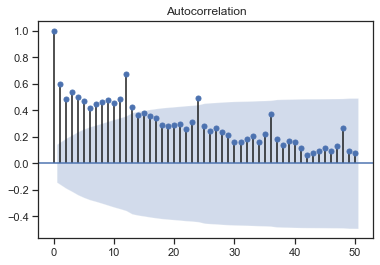

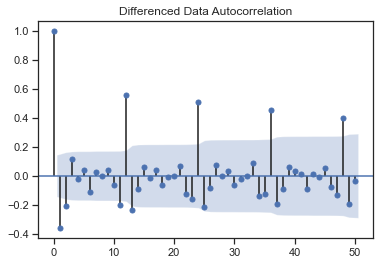

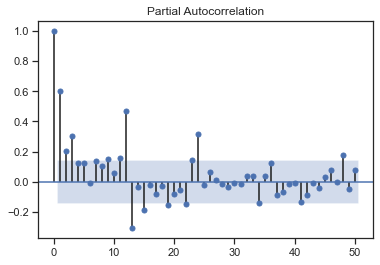

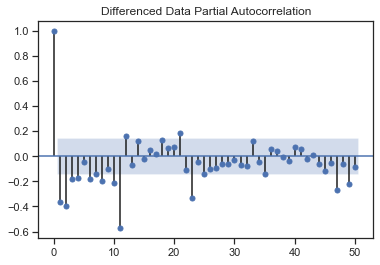

In [191]:
plot_acf(rose_df['Rose'],lags=50)
plot_acf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose_df['Rose'],lags=50)
plot_pacf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [192]:
manual_ARIMA = ARIMA(train_rose['Rose'].astype('float64'), order=(4,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -633.876
Method:                       css-mle   S.D. of innovations             29.793
Date:                Tue, 26 Jan 2021   AIC                           1283.753
Time:                        14:21:57   BIC                           1306.754
Sample:                    02-01-1980   HQIC                          1293.099
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1905      0.576     -0.331      0.741      -1.319       0.938
ar.L1.D.Rose     1.1685      0.087     13.391      0.000       0.997       1.340
ar.L2.D.Rose    -0.3562      0.132     -2.69

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [193]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_rose))

In [194]:
rmse6 = mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse6)

34.20942594231782


In [195]:
resultsDf3 = pd.DataFrame({'RMSE': [rmse6]}
                           ,index=['ARIMA(4,1,2)'])

resultsDf3

,RMSE
"ARIMA(4,1,2)",34.209426


<b>ROSE - SARIMA</b>

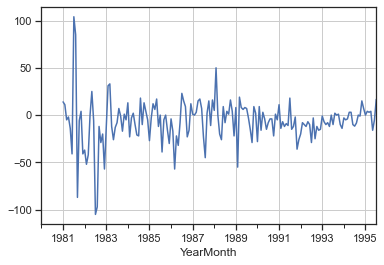

In [196]:
(rose_df['Rose'].diff(12)).plot()
plt.grid();

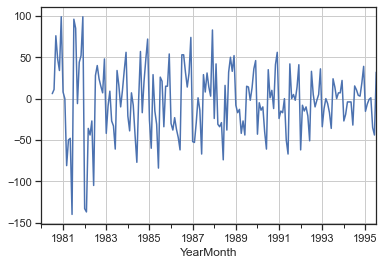

In [197]:
(rose_df['Rose'].diff(6)).plot()
plt.grid();

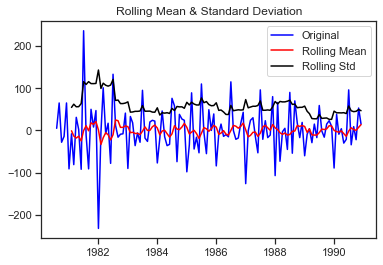

Results of Dickey-Fuller Test:
Test Statistic                -6.882869e+00
p-value                        1.418693e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [198]:
test_stationarity((train_rose['Rose'].diff(6).dropna()).diff(1).dropna())

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


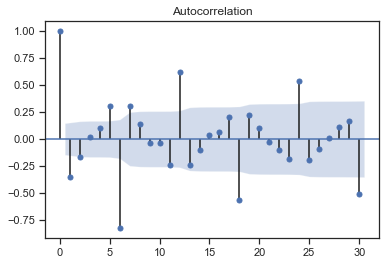

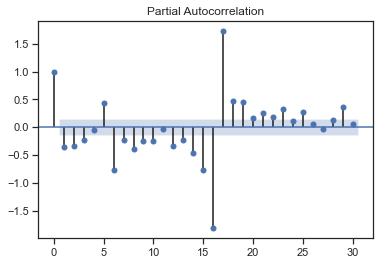

In [199]:
plot_acf((rose_df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((rose_df['Rose'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [200]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                order=(4, 1, 2),
                                seasonal_order=(3, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -436.852
Date:                           Tue, 26 Jan 2021   AIC                            897.704
Time:                                   14:22:17   BIC                            929.321
Sample:                                        0   HQIC                           910.510
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0219      1.307     -0.017      0.987      -2.583       2.539
ar.L2         -0.1642      0.142     -1.153

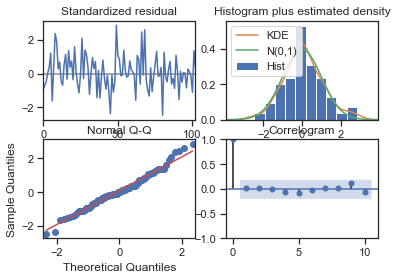

In [201]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [202]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test_rose))

In [203]:
rmse7 = mean_squared_error(test_rose['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse7)

23.7517101446551


In [204]:
resultsDf_temp = pd.DataFrame({'RMSE': [rmse7]}
                           ,index=['SARIMA(4,1,2)(3,1,2,6)'])
resultsDf3 = pd.concat([resultsDf3, resultsDf_temp])

resultsDf3

,RMSE
"ARIMA(4,1,2)",34.209426
"SARIMA(4,1,2)(3,1,2,6)",23.751710


<b>Sparkling - ARIMA</b>

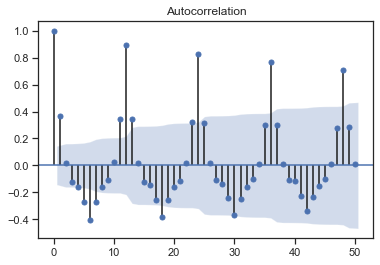

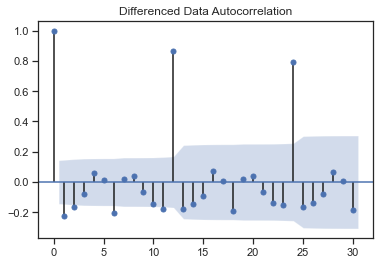

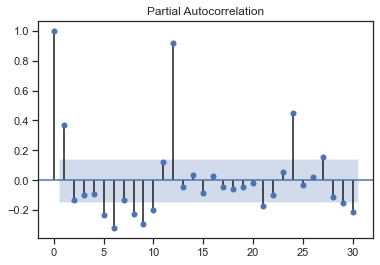

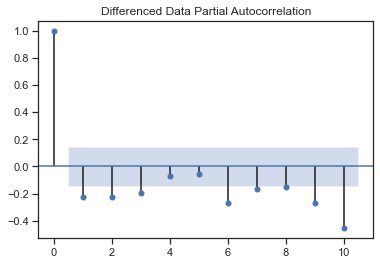

In [205]:
plot_acf(sparkling_df['Sparkling'],lags=50)
plot_acf(sparkling_df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plot_pacf(sparkling_df['Sparkling'],lags=30)
plot_pacf(sparkling_df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

In [206]:
manual_ARIMA1 = ARIMA(train_sparkling['Sparkling'].astype('float64'), order=(3,1,2),freq='MS')

results_manual_ARIMA1 = manual_ARIMA1.fit()

print(results_manual_ARIMA1.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.464
Method:                       css-mle   S.D. of innovations           1106.121
Date:                Tue, 26 Jan 2021   AIC                           2228.927
Time:                        14:22:20   BIC                           2249.054
Sample:                    02-01-1980   HQIC                          2237.106
                         - 12-01-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.9846      3.643      1.643      0.100      -1.156      13.125
ar.L1.D.Sparkling    -0.4420   5.85e-06  -7.55e+04      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [207]:
predicted_manual_ARIMA1 = results_manual_ARIMA1.forecast(steps=len(test_sparkling))

In [208]:
rmse8 = mean_squared_error(test_sparkling['Sparkling'],predicted_manual_ARIMA1[0],squared=False)
print(rmse8)

1437.4486454327175


In [209]:
resultsDf4 = pd.DataFrame({'RMSE': [rmse8]}
                           ,index=['ARIMA(3,1,2)'])

resultsDf4

,RMSE
"ARIMA(3,1,2)",1437.448645


<b>Sparkling - SARIMA</b>

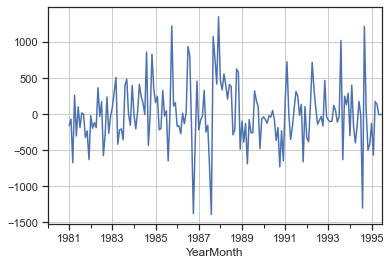

In [210]:
(sparkling_df['Sparkling'].diff(12)).plot()
plt.grid();

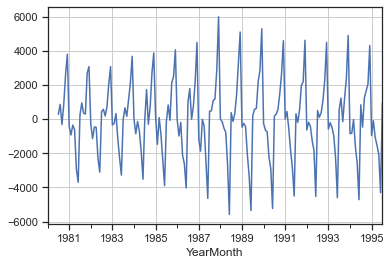

In [211]:
(sparkling_df['Sparkling'].diff(6)).plot()
plt.grid();

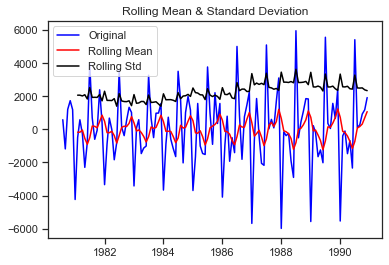

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [212]:
test_stationarity((train_sparkling['Sparkling'].diff(6).dropna()).diff(1).dropna())

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


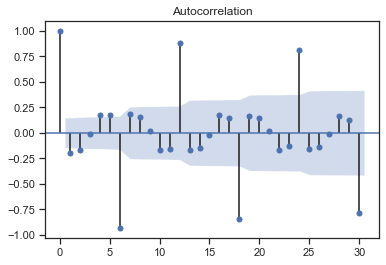

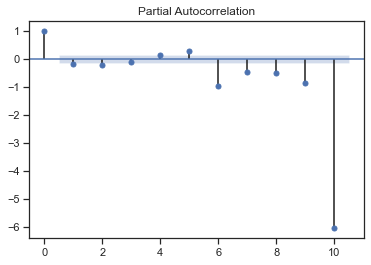

In [213]:
plot_acf((sparkling_df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((sparkling_df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=10);

In [214]:
import statsmodels.api as sm

manual_SARIMA1_6 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(2, 1, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1_6 = manual_SARIMA1_6.fit(maxiter=1000)
print(results_manual_SARIMA1_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 6)   Log Likelihood                -814.031
Date:                           Tue, 26 Jan 2021   AIC                           1648.062
Time:                                   14:22:29   BIC                           1675.067
Sample:                                        0   HQIC                          1659.015
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7614      1.164      0.654      0.513      -1.519       3.042
ar.L2         -0.1969      0.204     -0.963

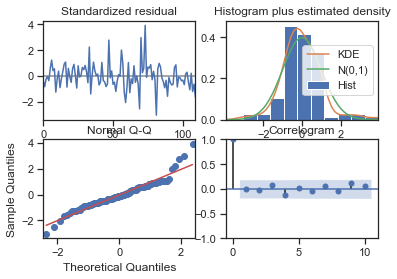

In [215]:
results_manual_SARIMA1_6.plot_diagnostics()
plt.show()

In [216]:
predicted_manual_SARIMA1_6 = results_manual_SARIMA1_6.get_forecast(steps=len(test_sparkling))

In [217]:
rmse9 = mean_squared_error(test_sparkling['Sparkling'],predicted_manual_SARIMA1_6.predicted_mean,squared=False)
print(rmse9)

1710.1965716733996


In [218]:
resultsDf_temp = pd.DataFrame({'RMSE': [rmse9]}
                           ,index=['SARIMA(3,1,2)(2,1,2,6)'])
resultsDf4 = pd.concat([resultsDf4, resultsDf_temp])

resultsDf4

,RMSE
"ARIMA(3,1,2)",1437.448645
"SARIMA(3,1,2)(2,1,2,6)",1710.196572


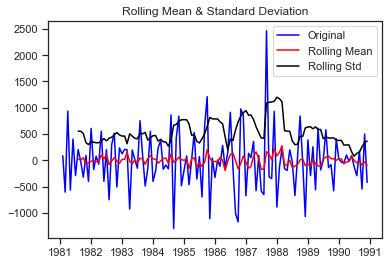

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [219]:
test_stationarity((train_sparkling['Sparkling'].diff(12).dropna()).diff(1).dropna())

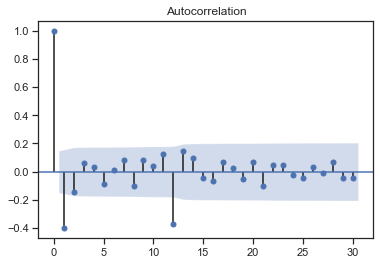

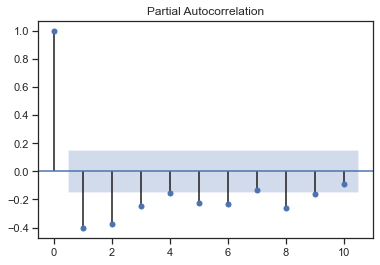

In [220]:
plot_acf((sparkling_df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((sparkling_df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=10);

In [221]:
import statsmodels.api as sm

manual_SARIMA1_12 = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA1_12 = manual_SARIMA1_12.fit(maxiter=1000)
print(results_manual_SARIMA1_12.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -323.675
Date:                              Tue, 26 Jan 2021   AIC                            673.349
Time:                                      14:23:12   BIC                            696.543
Sample:                                           0   HQIC                           681.951
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5242      0.189     -2.770      0.006      -0.895      -0.153
ar.L2          0.31

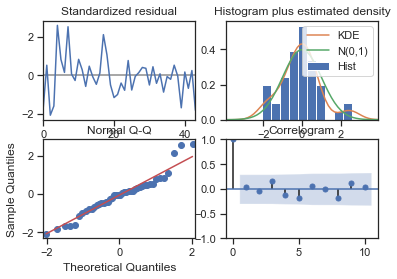

In [222]:
results_manual_SARIMA1_12.plot_diagnostics()
plt.show()

In [223]:
predicted_manual_SARIMA1_12 = results_manual_SARIMA1_12.get_forecast(steps=len(test_sparkling))

In [224]:
rmse10 = mean_squared_error(test_sparkling['Sparkling'],predicted_manual_SARIMA1_12.predicted_mean,squared=False)
print(rmse10)

1418.3996125944861


In [225]:
resultsDf_temp = pd.DataFrame({'RMSE': [rmse10]}
                           ,index=['SARIMA(3,1,2)(6,1,1,12)'])
resultsDf4 = pd.concat([resultsDf4, resultsDf_temp])

resultsDf4

,RMSE
"ARIMA(3,1,2)",1437.448645
"SARIMA(3,1,2)(2,1,2,6)",1710.196572
"SARIMA(3,1,2)(6,1,1,12)",1418.399613


<b>8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</b>

In [226]:
print("Result data frame for Rose:")
resultsDf = pd.concat([resultsDf, resultsDf1])
resultsDf = pd.concat([resultsDf, resultsDf3])
resultsDf

Result data frame for Rose:


,Test RMSE,RMSE
"Alpha=0.99,SES",36.861111,NaN
"Alpha=1,Beta=0.0189:DES",37.695925,NaN
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.058923,NaN
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",18.587715,NaN
RegressionOnTime,15.369603,NaN
NaiveModel,79.750253,NaN
SimpleAverageModel,53.506138,NaN
2pointTrailingMovingAverage,10.354667,NaN
4pointTrailingMovingAverage,13.725015,NaN
6pointTrailingMovingAverage,14.054791,NaN


In [227]:
print("Result data frame for Sparkling:")
results_sparkling = pd.concat([results_sparkling, resultsDf2])
results_sparkling = pd.concat([results_sparkling, resultsDf4])
results_sparkling

Result data frame for Sparkling:


,Test RMSE,RMSE
"Alpha=0.99,SES",2653.195251,NaN
"Alpha=1,Beta=0.0189:DES",3172.079532,NaN
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1735.797057,NaN
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1649.659222,NaN
RegressionOnTime,1394.441182,NaN
NaiveModel,3858.888237,NaN
SimpleAverageModel,1285.021003,NaN
2pointTrailingMovingAverage,770.928742,NaN
4pointTrailingMovingAverage,1137.137053,NaN
6pointTrailingMovingAverage,1283.096993,NaN


<b>9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</b>

<b>Rose:</b>

ARIMA- (0,1,2)

In [228]:
full_data_model = sm.tsa.statespace.SARIMAX(rose_df['Rose'],
                                order=(0,1,2),
                                seasonal_order=None,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  187
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -868.938
Date:                Tue, 26 Jan 2021   AIC                           1743.875
Time:                        14:23:13   BIC                           1753.504
Sample:                    01-01-1980   HQIC                          1747.778
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7147      0.058    -12.383      0.000      -0.828      -0.602
ma.L2         -0.1707      0.057     -2.999      0.003      -0.282      -0.059
sigma2       775.3511     59.099     13.119      0.0

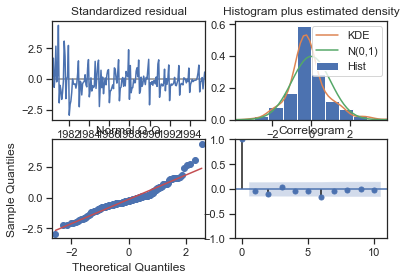

In [229]:
results_full_data_model.plot_diagnostics();

In [230]:
rose_predicted_manual_SARIMA = results_full_data_model.get_forecast(steps=12)

In [231]:
rose_predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,51.258764,27.845127,-3.316682,105.834210
1995-09-01,48.557014,28.955825,-8.195360,105.309388
1995-10-01,48.557014,29.130837,-8.538377,105.652406
1995-11-01,48.557014,29.304804,-8.879347,105.993375
1995-12-01,48.557014,29.477745,-9.218304,106.332332


In [232]:
rmse11 = mean_squared_error(rose_df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse11)

RMSE of the Full Model 28.983938057879612


Rose - SARIMA:

In [233]:
full_data_model1 = sm.tsa.statespace.SARIMAX(rose_df['Rose'],
                                order=(4,1,2),
                                seasonal_order=(3,1,2,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model1 = full_data_model1.fit(maxiter=1000)
print(results_full_data_model1.summary())

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 2)x(3, 1, 2, 6)   Log Likelihood                -652.627
Date:                           Tue, 26 Jan 2021   AIC                           1329.255
Time:                                   14:23:34   BIC                           1366.006
Sample:                               01-01-1980   HQIC                          1344.180
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5379      0.240     -2.239      0.025      -1.009      -0.067
ar.L2         -0.4315      0.140     -3.078

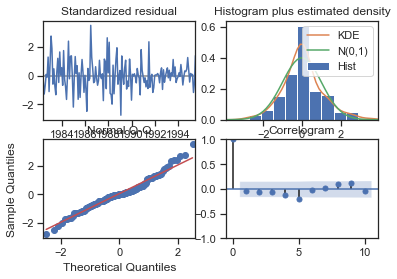

In [234]:
results_full_data_model1.plot_diagnostics();

In [235]:
rose_predicted_manual_SARIMA1 = results_full_data_model1.get_forecast(steps=12)

In [236]:
rose_predicted_manual_SARIMA1.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,49.567682,15.007279,20.153956,78.981409
1995-09-01,47.195147,15.836524,16.156131,78.234163
1995-10-01,44.523802,16.306989,12.562691,76.484913
1995-11-01,52.247976,16.506172,19.896474,84.599478
1995-12-01,80.295657,16.887908,47.195966,113.395348


In [237]:
rmse12 = mean_squared_error(rose_df['Rose'],results_full_data_model1.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse12)

RMSE of the Full Model 28.180931856950206


<b>Sparkling</b>

ARIMA - (2,1,2)

In [238]:
full_data_model2 = sm.tsa.statespace.SARIMAX(sparkling_df['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=None,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model2 = full_data_model2.fit(maxiter=1000)
print(results_full_data_model2.summary())

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  187
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1561.536
Date:                Tue, 26 Jan 2021   AIC                           3133.072
Time:                        14:23:36   BIC                           3149.120
Sample:                    01-01-1980   HQIC                          3139.577
                         - 07-01-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5945      0.100     -5.923      0.000      -0.791      -0.398
ar.L2          0.4079      0.099      4.101      0.000       0.213       0.603
ma.L1          0.0020      0.181      0.011      0.9

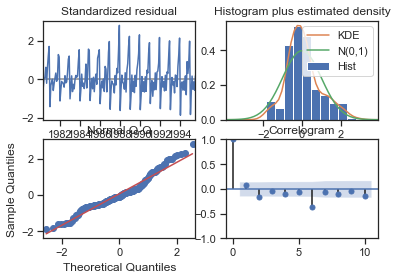

In [239]:
results_full_data_model2.plot_diagnostics();

In [240]:
sparkling_predicted_manual_SARIMA2 = results_full_data_model2.get_forecast(steps=12)

In [241]:
sparkling_predicted_manual_SARIMA2.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,2594.730542,1375.870492,-101.926070,5291.387153
1995-09-01,2148.366455,1485.372810,-762.910756,5059.643666
1995-10-01,2643.675841,1506.338704,-308.693768,5596.045449
1995-11-01,2167.146356,1509.743080,-791.895706,5126.188418
1995-12-01,2652.477642,1511.052860,-309.131542,5614.086827


In [242]:
rmse13 = mean_squared_error(sparkling_df['Sparkling'],results_full_data_model2.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse13)

RMSE of the Full Model 1196.0738872089164


<b>Sparkling - SARIMA</b>

In [243]:
full_data_model3 = sm.tsa.statespace.SARIMAX(sparkling_df['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(2,1,2,6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model3 = full_data_model3.fit(maxiter=1000)
print(results_full_data_model3.summary())

C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\karthika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 6)   Log Likelihood               -1215.150
Date:                           Tue, 26 Jan 2021   AIC                           2450.300
Time:                                   14:23:49   BIC                           2481.359
Sample:                               01-01-1980   HQIC                          2462.908
                                    - 07-01-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9667      0.168      5.750      0.000       0.637       1.296
ar.L2         -0.1517      0.125     -1.215

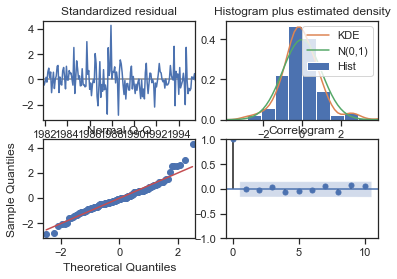

In [244]:
results_full_data_model3.plot_diagnostics();

In [245]:
sparkling_predicted_manual_SARIMA3 = results_full_data_model3.get_forecast(steps=12)

In [246]:
sparkling_predicted_manual_SARIMA3.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1860.530544,375.880508,1123.818285,2597.242803
1995-09-01,2463.408387,380.293526,1718.046772,3208.770002
1995-10-01,3291.706039,380.298368,2546.334936,4037.077143
1995-11-01,3955.354343,380.429356,3209.726506,4700.982180
1995-12-01,6158.703534,380.708833,5412.527932,6904.879136


In [247]:
rmse14 = mean_squared_error(sparkling_df['Sparkling'],results_full_data_model3.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse14)

RMSE of the Full Model 617.9729972947009


<b>10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.</b> <br/>
Commented in business report